In [191]:
#importing the libraries
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [59]:
#importing the csv training/testing/holdout set
train_data = pd.read_csv('/Users/pratiksha/Desktop/Spring 2018/Fraud Analytics/Project 2/training_data.csv',index_col=0)
test_data = pd.read_csv('/Users/pratiksha/Desktop/Spring 2018/Fraud Analytics/Project 2/testing_data.csv',index_col=0)
oot_data = pd.read_csv('/Users/pratiksha/Desktop/Spring 2018/Fraud Analytics/Project 2/holdout_data.csv',index_col=0)
print(train_data.shape)
print(test_data.shape)
print(oot_data.shape)

(54386, 16)
(23464, 16)
(17016, 16)


In [195]:
#We have X (predictors) and Y (fraud) for training data set and X_test(predictor) of test_dataset
Y = train_data["fraud"]
X= train_data.iloc[:,2:17]
X_test = test_data.iloc[:,2:17]
Y_test = test_data["fraud"]
X_OOT = oot_data.iloc[:,2:17]
Y_OOT = oot_data["fraud"]

0.53108917474
0.53108917474


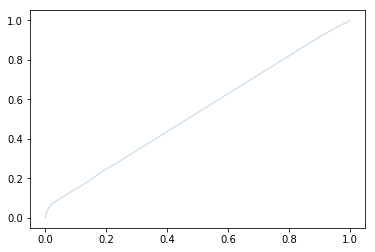

0.533518367572
0.533518367572


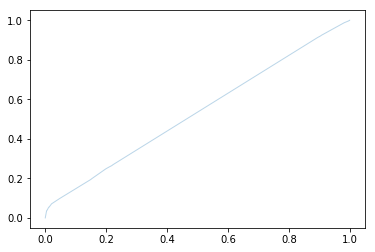

0.534214307467
0.534214307467


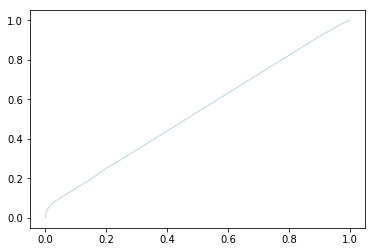

0.535442362938
0.535442362938


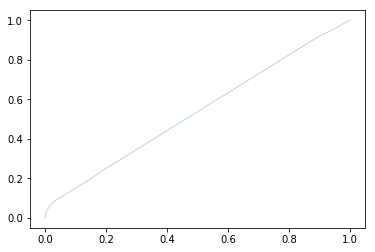

0.535349245254
0.535349245254


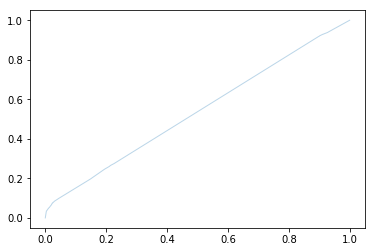

0.536825047872
0.536825047872


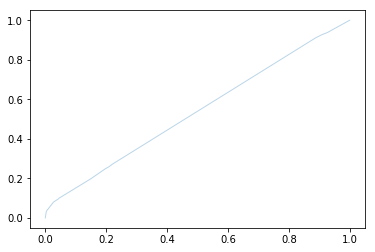

0.5331805018
0.5331805018


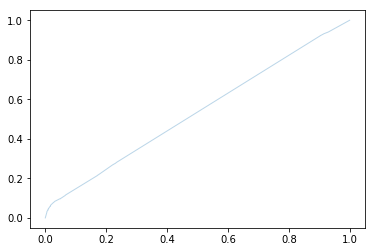

In [194]:
# Features which will make the model training easier
#1.n_jobs : tells the engine how many processors is it allowed to use. A value of “-1” means there is no restriction.
#2.random_state: This parameter makes a solution easy to replicate. A definite value of random_state will always produce same results if given with same parameters and training data.
#3.oob_score : This is a random forest cross validation method. It is very similar to leave one out validation technique, however, this is so much faster. This method simply tags every observation used in different tress. And then it finds out a maximum vote score for every observation based on only trees which did not use this particular observation to train itself.

#Features which make predictions of the model better
#1. max_features: These are the maximum number of features Random Forest is allowed to try in individual tree.
#2. n_estimators: This is the number of trees you want to build before taking the maximum voting or averages of predictions.
#3. min_sample_leaf : Generally prefered a minimum leaf size of more than 50. However, should try multiple leaf sizes to find the most optimum for your use case.

# Create Random Forest object
# '%timeit” is a function which runs a function multiple times and gives the fastest loop run time. This comes out very handy while scalling up a particular function from prototype to final dataset.
%timeit
sample_leaf_options = [1,5,10,50,100,200,500]
for leaf_size in sample_leaf_options :
    model= RandomForestClassifier(n_estimators=1000,oob_score = True,n_jobs = -1,random_state =1,
                              max_features = "auto", min_samples_leaf = leaf_size)
    model.fit(X,Y) #Train the model using the training sets and check score
    predicted_test= model.predict_proba(X_test) #Predict Output
    predicted_test = pd.DataFrame(predicted_test).iloc[:,1:2] #selecting the column with probabilities for fraud == 1
    acc = roc_auc_score(Y_test,predicted_test) #checking acc from AUC  
    print(acc)
    fpr, tpr, thresholds = roc_curve(Y_test, predicted_test)
    roc_auc = auc(fpr, tpr)
    print(roc_auc) #cross checking acc 
    plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (leaf_size, roc_auc))
    plt.show()
#min_sample_leaf of 200 gives the best auc score. Running the model with min_sample_leaf = 200 on the oot data

In [172]:
#Running the best model on OOT


,0,1
0,0.197750,1
1,0.197750,1
2,0.197750,1
3,0.197750,1
4,0.197750,1
5,0.197750,1
6,0.197750,1
7,0.197750,0
8,0.197750,1
9,0.197750,0


0.537600657008
0.537600657008


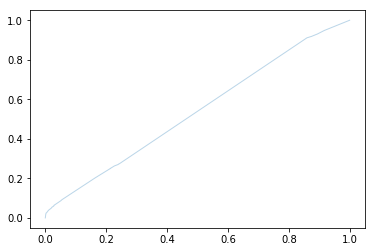

In [197]:
#Predicting scores for OOT data
model_best= RandomForestClassifier(n_estimators=1000,oob_score = True,n_jobs = -1,random_state =1,
                              max_features = "auto", min_samples_leaf = 200)
model_best.fit(X,Y) #Train the model using the training sets and check score
predicted_oot= model_best.predict_proba(X_OOT) #Predict Output for OOT
predicted_oot = pd.DataFrame(predicted_oot).iloc[:,1:2] #selecting the column with probabilities for fraud == 1
acc = roc_auc_score(Y_OOT,predicted_oot) #checking acc from AUC  
print(acc)
fpr, tpr, thresholds = roc_curve(Y_OOT, predicted_oot)
roc_auc = auc(fpr, tpr)
print(roc_auc) #cross checking acc 
plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (leaf_size, roc_auc))
plt.show()


/Users/pratiksha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.549849167487
0.549849167487


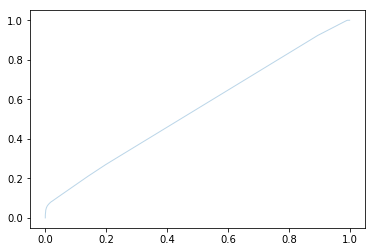

/Users/pratiksha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.544998562947
0.544998562947


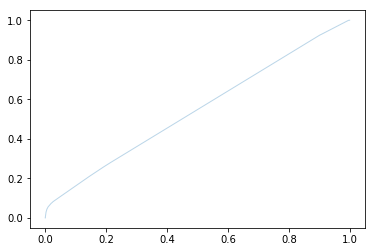

/Users/pratiksha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.543902635176
0.543902635176


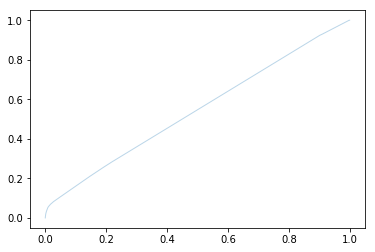

/Users/pratiksha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.541671110635
0.541671110635


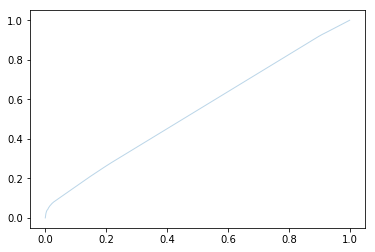

/Users/pratiksha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.541197425845
0.541197425845


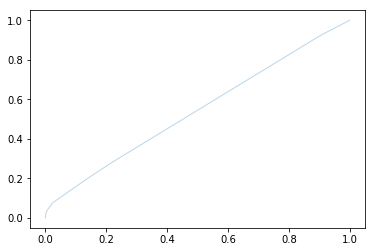

/Users/pratiksha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.540365103127
0.540365103127


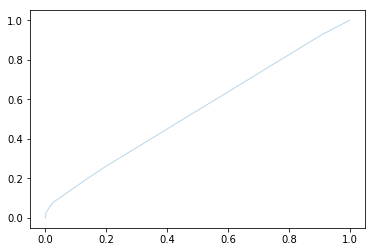

/Users/pratiksha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.539508224648
0.539508224648


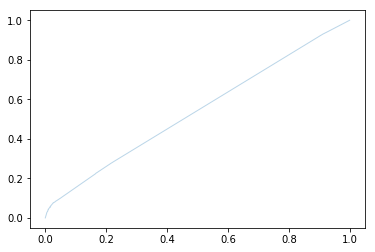

In [201]:
#Predicting for training test
sample_leaf_options = [1,5,10,50,100,200,500]
for leaf_size in sample_leaf_options :
    model= RandomForestClassifier(n_estimators=1000,oob_score = True,n_jobs = -1,random_state =1,
                              max_features = "auto", min_samples_leaf = leaf_size)
    model.fit(X,Y) #Train the model using the training sets and check score
    predicted_train= model.predict_proba(X) #Predict Output of train
    predicted_train = pd.DataFrame(predicted_train).iloc[:,1:2] #selecting the column with probabilities for fraud == 1
    acc = roc_auc_score(Y,predicted_train) #checking acc from AUC  
    print(acc)
    fpr, tpr, thresholds = roc_curve(Y, predicted_train)
    roc_auc = auc(fpr, tpr)
    print(roc_auc) #cross checking acc 
    plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (leaf_size, roc_auc))
    plt.show()

/Users/pratiksha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.549849167487
0.549849167487


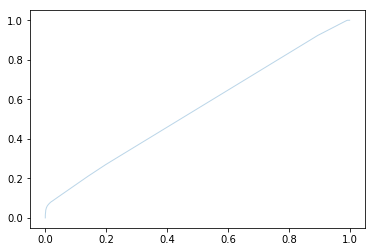

In [203]:
# Modelling with leaf_size 1
model= RandomForestClassifier(n_estimators=1000,oob_score = True,n_jobs = -1,random_state =1,
                              max_features = "auto", min_samples_leaf = 1)
model.fit(X,Y) #Train the model using the training sets and check score
predicted_train= model.predict_proba(X) #Predict Output of train
predicted_train = pd.DataFrame(predicted_train).iloc[:,1:2] #selecting the column with probabilities for fraud == 1
acc = roc_auc_score(Y,predicted_train) #checking acc from AUC  
print(acc)
fpr, tpr, thresholds = roc_curve(Y, predicted_train)
roc_auc = auc(fpr, tpr)
print(roc_auc) #cross checking acc 
plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (1, roc_auc))
plt.show()

In [204]:
#generating the file for train data to measure FDR
Y = pd.DataFrame(Y)
Y = Y.reset_index(drop=True)
pred_train_rf = pd.concat([predicted_train,Y],join='outer', ignore_index=True, axis = 1)
pred_train_rf
#writing the file to csv
pred_train_rf.to_csv('pred_train_rf.csv')

In [ ]:
#generating the file for test data to measure FDR
Y_test = pd.DataFrame(Y_test)
Y_test
Y_test = Y_test.reset_index(drop=True)
pred_test_rf = pd.concat([predicted_test,Y_test],join='outer', ignore_index=True, axis = 1)
pred_test_rf
#writing the file to csv
pred_test_rf.to_csv('pred_test_rf.csv')

In [ ]:
#generating the file for oot data to measure FDR
Y_OOT = pd.DataFrame(Y_OOT)
Y_OOT = Y_OOT.reset_index(drop=True)
pred_oot_rf = pd.concat([predicted_oot,Y_OOT],join='outer', ignore_index=True, axis = 1)
pred_oot_rf
#writing the file to csv
pred_oot_rf.to_csv('pred_oot_rf.csv')